# Libraries

In [1]:
from datascience import *

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

# Reading Files

In [2]:
#reading csv files
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id= pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

# Cab Data

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab.shape

(359392, 7)

In [6]:
cab[cab.duplicated(keep=False)].shape[0]

0

In [7]:
cab.isna().any().any()

False

In [8]:
datelist = cab['Date of Travel'].to_list()
base = pd.Timestamp('1899-12-29')
newdatelist = [base + pd.DateOffset(date_offset) for date_offset in datelist]

In [9]:
cab['Date of Travel'] = pd.to_datetime(newdatelist, format='%y/%m/%d')
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [10]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
cab = cab.sort_values(by='Date of Travel')
cab = cab.reset_index(drop=True)
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840


# City Data

In [12]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
city.shape

(20, 3)

In [15]:
city[city.duplicated(keep=False)].shape[0]

0

In [16]:
city.isna().any().any()

False

In [17]:
city.Population = city.Population.str.replace(',', "").astype(float)
city.Users = city.Users.str.replace(",", "").astype(float)

In [18]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


# Customer Data

In [19]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [20]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [21]:
customer_id.shape

(49171, 4)

In [22]:
customer_id[customer_id.duplicated(keep=False)].shape[0]

0

In [23]:
customer_id.isna().any().any()

False

# Transaction Data

In [24]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [25]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [26]:
transaction_id.shape

(440098, 3)

In [27]:
transaction_id[transaction_id.duplicated(keep=False)].shape[0]

0

In [28]:
transaction_id.isna().any().any()

False

# Masterdata

In [29]:
master_data = city.merge(cab, on = 'City').merge(transaction_id, on = "Transaction ID").merge(customer_id, on = "Customer ID")

In [30]:
master_data.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,8405837.0,302149.0,10001001,2016-01-01,Yellow Cab,46.80,1391.91,595.2960,2761,Card,Male,40,11462
1,NEW YORK NY,8405837.0,302149.0,10021391,2016-03-25,Yellow Cab,32.98,970.67,459.0816,2761,Card,Male,40,11462
2,NEW YORK NY,8405837.0,302149.0,10025115,2016-04-14,Yellow Cab,24.15,706.93,304.2900,2761,Card,Male,40,11462
3,NEW YORK NY,8405837.0,302149.0,10033040,2016-05-12,Yellow Cab,17.55,425.63,248.5080,2761,Card,Male,40,11462
4,NEW YORK NY,8405837.0,302149.0,10074198,2016-09-04,Yellow Cab,39.96,971.57,503.4960,2761,Card,Male,40,11462


In [31]:
master_data = master_data.sort_values("Date of Travel")

In [32]:
master_data['Year'] = master_data['Date of Travel'].dt.year
master_data['Month'] = master_data['Date of Travel'].dt.month
master_data['Day'] = master_data['Date of Travel'].dt.day
master_data.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
0,NEW YORK NY,8405837.0,302149.0,10001001,2016-01-01,Yellow Cab,46.80,1391.91,595.2960,2761,Card,Male,40,11462,2016,1,1
1108,NEW YORK NY,8405837.0,302149.0,10000864,2016-01-01,Yellow Cab,15.68,484.49,191.9232,1405,Card,Male,64,12353,2016,1,1
1066,NEW YORK NY,8405837.0,302149.0,10000865,2016-01-01,Yellow Cab,5.88,176.12,72.6768,2911,Card,Male,57,13404,2016,1,1
1030,NEW YORK NY,8405837.0,302149.0,10000853,2016-01-01,Yellow Cab,19.76,703.20,248.9760,2760,Card,Male,21,4399,2016,1,1
990,NEW YORK NY,8405837.0,302149.0,10000883,2016-01-01,Yellow Cab,27.27,848.51,333.7848,2794,Cash,Male,59,5342,2016,1,1


In [33]:
master_data.shape

(359392, 17)

In [34]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 182928
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  float64       
 2   Users               359392 non-null  float64       
 3   Transaction ID      359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [35]:
master_data.isna().any().any()

False

In [36]:
master_data[master_data.duplicated(keep=False)].shape[0]

0

In [37]:
pinkcab = master_data[master_data["Company"] == "Pink Cab"]
pinkcab.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
223546,SAN DIEGO CA,959307.0,69995.0,10000201,2016-01-01,Pink Cab,31.68,623.77,370.656,18490,Card,Male,24,10573,2016,1,1
223520,SAN DIEGO CA,959307.0,69995.0,10000189,2016-01-01,Pink Cab,41.76,793.63,476.064,18488,Cash,Male,37,22441,2016,1,1
223516,SAN DIEGO CA,959307.0,69995.0,10000187,2016-01-01,Pink Cab,23.80,485.21,252.280,18817,Cash,Male,40,5038,2016,1,1
223506,SAN DIEGO CA,959307.0,69995.0,10000182,2016-01-01,Pink Cab,2.36,47.89,23.600,18418,Cash,Male,39,13112,2016,1,1
223498,SAN DIEGO CA,959307.0,69995.0,10000171,2016-01-01,Pink Cab,14.28,269.15,147.084,20687,Cash,Male,39,8926,2016,1,1


In [38]:
yellowcab = master_data[master_data["Company"] == "Yellow Cab"]
yellowcab.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
0,NEW YORK NY,8405837.0,302149.0,10001001,2016-01-01,Yellow Cab,46.80,1391.91,595.2960,2761,Card,Male,40,11462,2016,1,1
1108,NEW YORK NY,8405837.0,302149.0,10000864,2016-01-01,Yellow Cab,15.68,484.49,191.9232,1405,Card,Male,64,12353,2016,1,1
1066,NEW YORK NY,8405837.0,302149.0,10000865,2016-01-01,Yellow Cab,5.88,176.12,72.6768,2911,Card,Male,57,13404,2016,1,1
1030,NEW YORK NY,8405837.0,302149.0,10000853,2016-01-01,Yellow Cab,19.76,703.20,248.9760,2760,Card,Male,21,4399,2016,1,1
990,NEW YORK NY,8405837.0,302149.0,10000883,2016-01-01,Yellow Cab,27.27,848.51,333.7848,2794,Cash,Male,59,5342,2016,1,1


In [39]:
#Until now I cleaned, merged and controled data sets. Also, I converted data type and seperated "Date of Travel" to analyse it easily later. After here, I'm gonna visualize my data and try to conclude it.

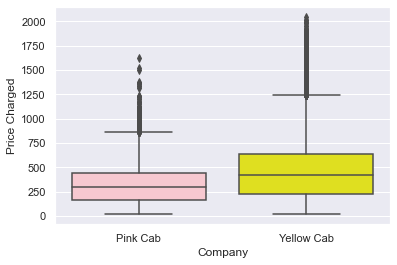

In [43]:
sns.set(style = "darkgrid")

pal = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

# usual boxplot, plotted on a matplotlib.axes object named ax
box_plot = sns.boxplot(x = "Company", 
                 y = "Price Charged", 
                 data = master_data,
                 order = ["Pink Cab", "Yellow Cab"], 
                 palette = pal)

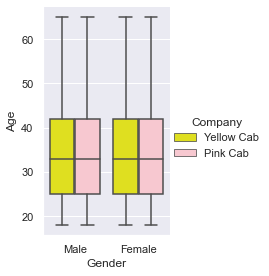

In [50]:
sns.set(style = "darkgrid")
pal = {"Pink Cab": "pink", "Yellow Cab": "yellow"}

box_plot = sns.catplot(x = "Gender",
                       y = "Age",
                       hue = "Company",
                       color = "Company",
                       data = master_data,
                       kind = "box",
                       height = 4,
                       aspect = .7, 
                       palette = pal)

In [59]:
yellowcab_usage = len(yellowcab)
pinkcab_usage = len(pinkcab)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1008x432 with 0 Axes>